In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["cmr10", "cmsy10"]
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = [4, 3]
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 9
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["axes.grid"] = True


import Qubits

beta = 200
delta = 40

resolution = 50

In [3]:
beenakker = Qubits.gatemon_flux(resolution, delta/beta, delta, [0.1], 0)
beenakker.beenakker = True

max_channels = 10
E = np.zeros((max_channels, 5))
gamma = np.zeros((max_channels, 2))
channels = np.array(range(1, max_channels+1))

for i in range(max_channels):
    arr = np.ones(i+1)*0.0
    arr[0] = 1.0
    beenakker.T = arr
    beenakker.solve()
    gamma[i,:] = beenakker.T_1_gamma()

    E[i,:] = beenakker.eigvals[:5]

Text(0, 0.5, 'Energy [GHz$\\cdot h$]')

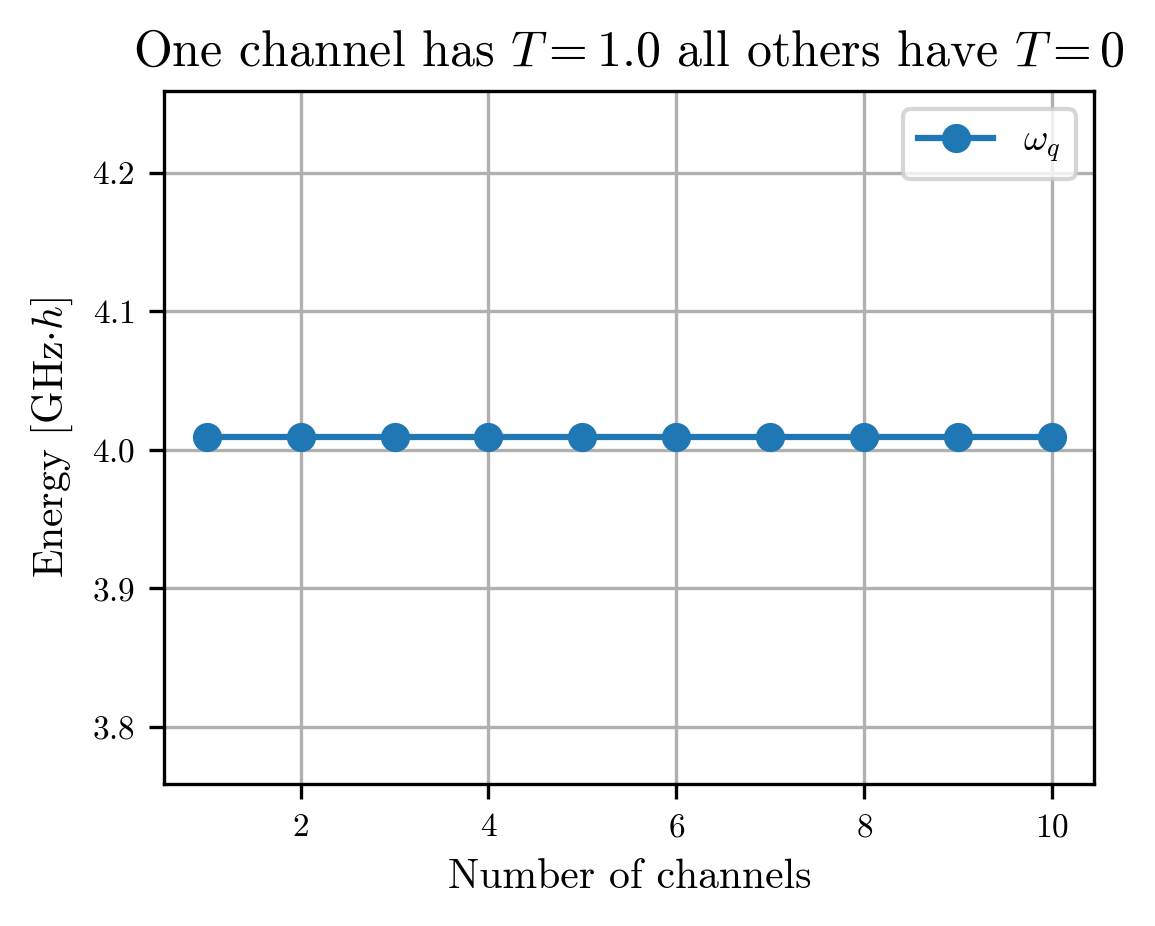

In [4]:
plt.plot(channels, E[:,1]-E[:,0], "-o", label = r"$\omega_q$")
plt.legend()
plt.ylim(min(E[:,1]-E[:,0])-0.25,max(E[:,1]-E[:,0])+0.25)
plt.title(r"One channel has $T=1.0$ all others have $T=0$")
plt.xlabel("Number of channels")
plt.ylabel(r"Energy [GHz$\cdot h$]")

Text(0.5, 1.0, 'One channel has $T=1.0$ all others have $T=0$')

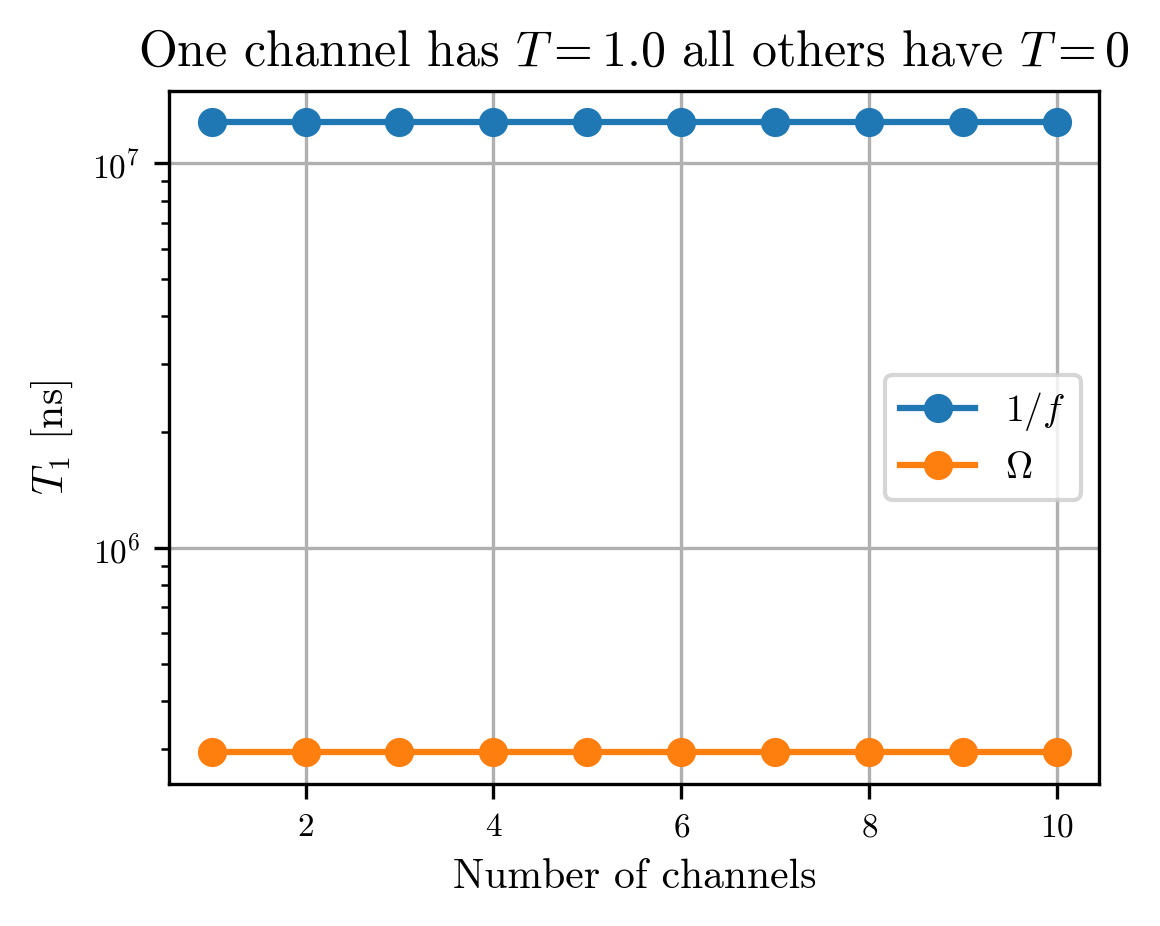

In [5]:
plt.plot(channels, 1/gamma[:,0], "-o", label = r"$1/f$")
plt.plot(channels, 1/gamma[:,1], "-o", label = r"$\Omega$")
plt.legend()
plt.yscale("log")
plt.xlabel("Number of channels")
plt.ylabel(r"$T_1$ [ns]")
plt.title(r"One channel has $T=1.0$ all others have $T=0$")

In [6]:
multi_T_res = 200

V_gate = np.linspace(-15, 15, multi_T_res)

T_arr = np.zeros((multi_T_res, 4))

T_arr[:,0] = np.tanh(V_gate - 11)/2 + 1/2
T_arr[:,1] = np.tanh(V_gate - 4)/2 + 1/2
T_arr[:,2] = np.tanh(V_gate + 4)/2 + 1/2
T_arr[:,3] = np.tanh(V_gate + 11)/2 + 1/2

three_channel_gatemon = Qubits.gatemon_flux(resolution, delta/beta, delta, [0.1, 0.1, 0.1], 0)
three_channel_gatemon.beenakker = True

frequency = np.zeros(multi_T_res)
gamma3 = np.zeros((2, multi_T_res))

frequency02 = np.zeros(multi_T_res)


In [7]:
for i in range(multi_T_res):
    three_channel_gatemon.T = T_arr[i,:]
    three_channel_gatemon.solve()
    frequency[i] = three_channel_gatemon.eigvals[1] - three_channel_gatemon.eigvals[0]
    frequency02[i] = (three_channel_gatemon.eigvals[2] - three_channel_gatemon.eigvals[0])/2

    gamma3[:,i] = three_channel_gatemon.T_1_gamma()

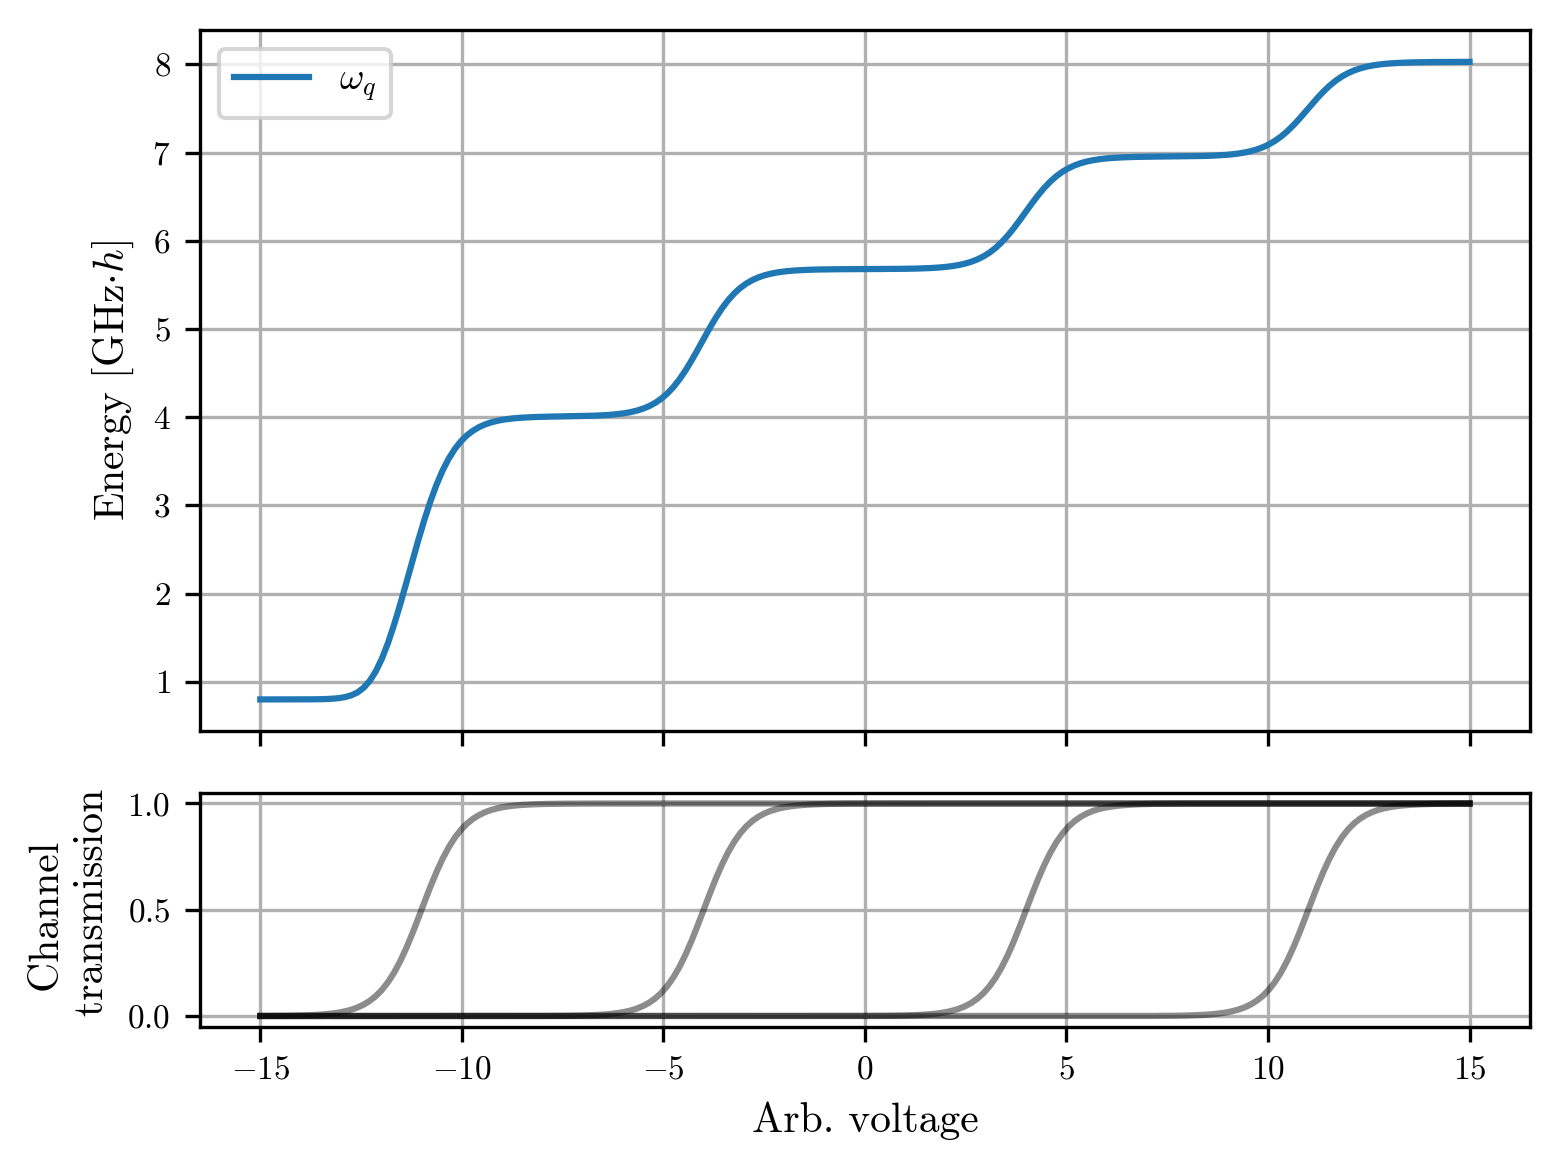

In [8]:
fig, ax = plt.subplots(2,1, figsize=((5.3, 4)), height_ratios=[3,1], sharex = True)

ax[0].plot(V_gate, frequency, label = r"$\omega_q$")
#ax[0].plot(V_gate, frequency02, label = r"$\omega_{02}/2$")
ax[0].set_ylabel(r"Energy [GHz$\cdot h$]")
for i in range(4):
    ax[1].plot(V_gate, T_arr[:,i], color = "black", alpha = 0.45)

#ax[0].plot(V_gate, 2*np.sqrt(V_gate/2 + 15), label = r"$\propto \sqrt{n}$")
ax[0].legend()

ax[1].set_xlabel("Arb. voltage")
ax[1].set_ylabel("Channel \n transmission")
fig.tight_layout()

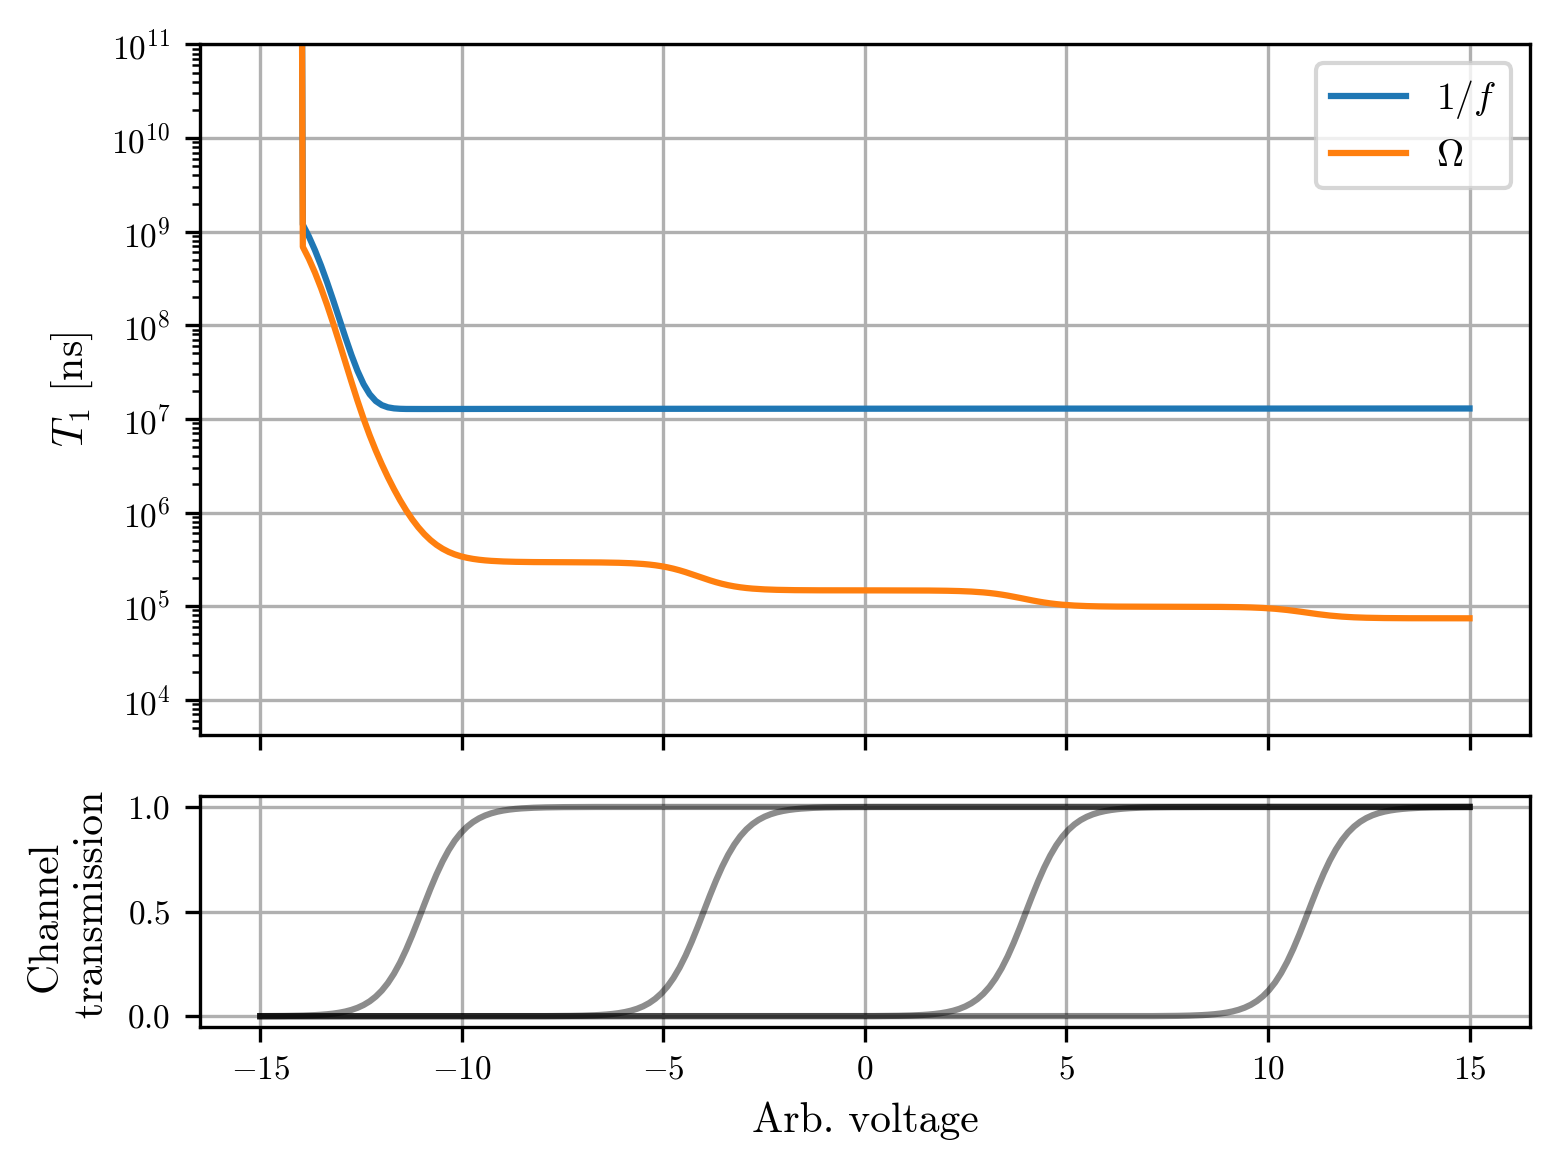

In [9]:
fig, ax = plt.subplots(2,1, figsize=((5.3, 4)), height_ratios=[3,1], sharex = True)

ax[0].plot(V_gate, 1/gamma3[0,:], label = r"$1/f$")
ax[0].plot(V_gate, 1/gamma3[1,:], label = r"$\Omega$")
#ax[0].plot(V_gate, 1/(gamma3[0,:] + gamma3[1,:]), label = "Total")
ax[0].legend()
ax[0].set_yscale("log")
ax[0].set_ylabel(r"$T_1$ [ns]")
ax[0].set_ylim(top=1e11)


for i in range(4):
    ax[1].plot(V_gate, T_arr[:,i], color = "black", alpha = 0.45)
    
ax[1].set_xlabel("Arb. voltage")
ax[1].set_ylabel("Channel \n transmission")
fig.tight_layout()

In [10]:
EJ = (frequency + delta/beta)**2/(8*delta/beta)

EJ_approx = delta/4*np.sum(T_arr, axis=1)

transmon = Qubits.transmon_flux(resolution, delta/beta, 10, 0)

transmon_weight = EJ/(delta/beta)

transmon_frequency = np.zeros_like(EJ) 

transmon_1f = np.zeros_like(EJ) 
transmon_ohmic = np.zeros_like(EJ) 

In [11]:
for i in range(len(EJ)):
    transmon.EJ = EJ[i]
    transmon.solve()
    gamma = transmon.T_1_gamma()
    transmon_1f[i] = gamma[0]
    transmon_ohmic[i] = gamma[1]
    transmon_frequency[i] = transmon.eigvals[1] - transmon.eigvals[0]

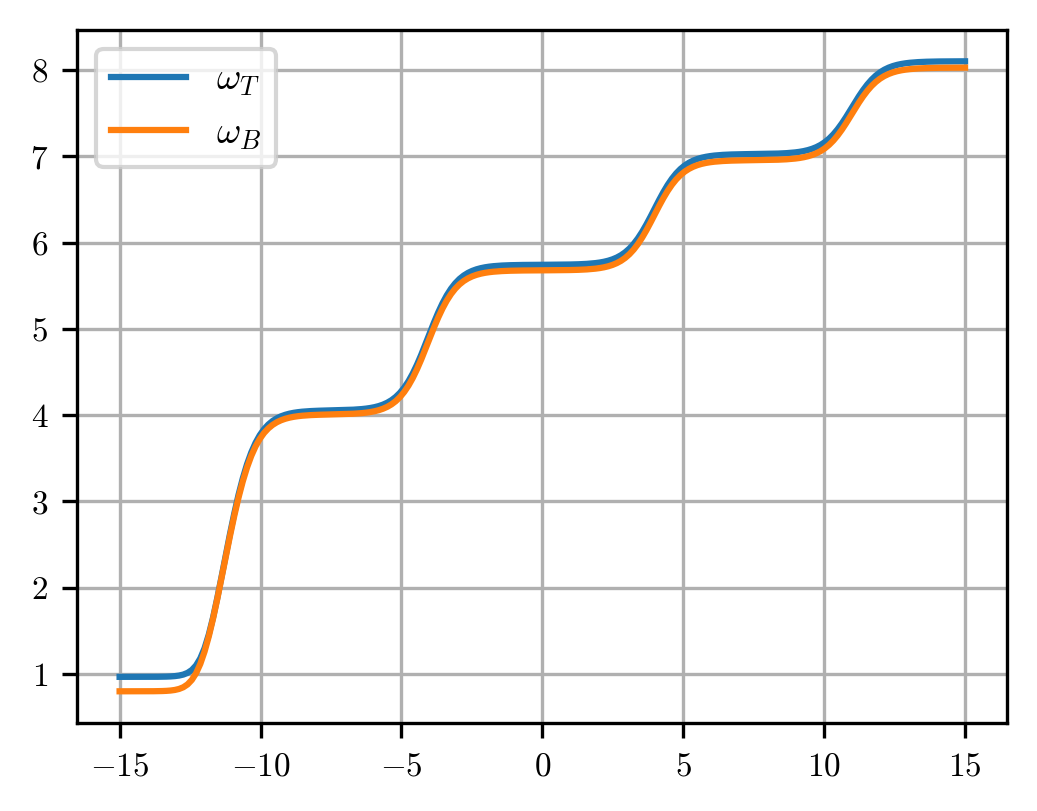

In [12]:
plt.plot(V_gate, transmon_frequency, label = r"$\omega_T$")
plt.plot(V_gate, frequency, label = r"$\omega_B$")
plt.legend()

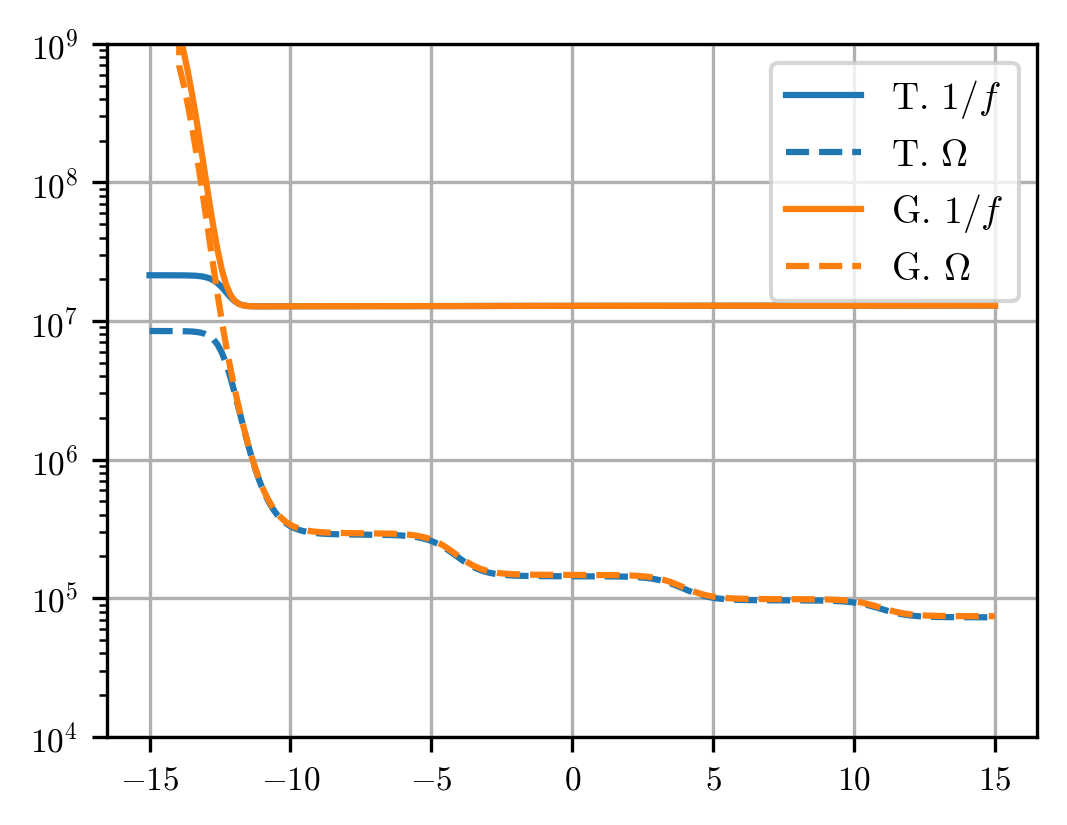

In [13]:
plt.plot(V_gate, 1/transmon_1f, label = r"T. $1/f$", color = "C0")
plt.plot(V_gate, 1/transmon_ohmic,"--", label = r"T. $\Omega$", color = "C0")

plt.plot(V_gate, 1/gamma3[0,:], label = r"G. $1/f$", color = "C1")
plt.plot(V_gate, 1/gamma3[1,:],"--", label = r"G. $\Omega$", color = "C1")

plt.ylim(1e4, 1e9)
plt.yscale("log")
plt.legend()

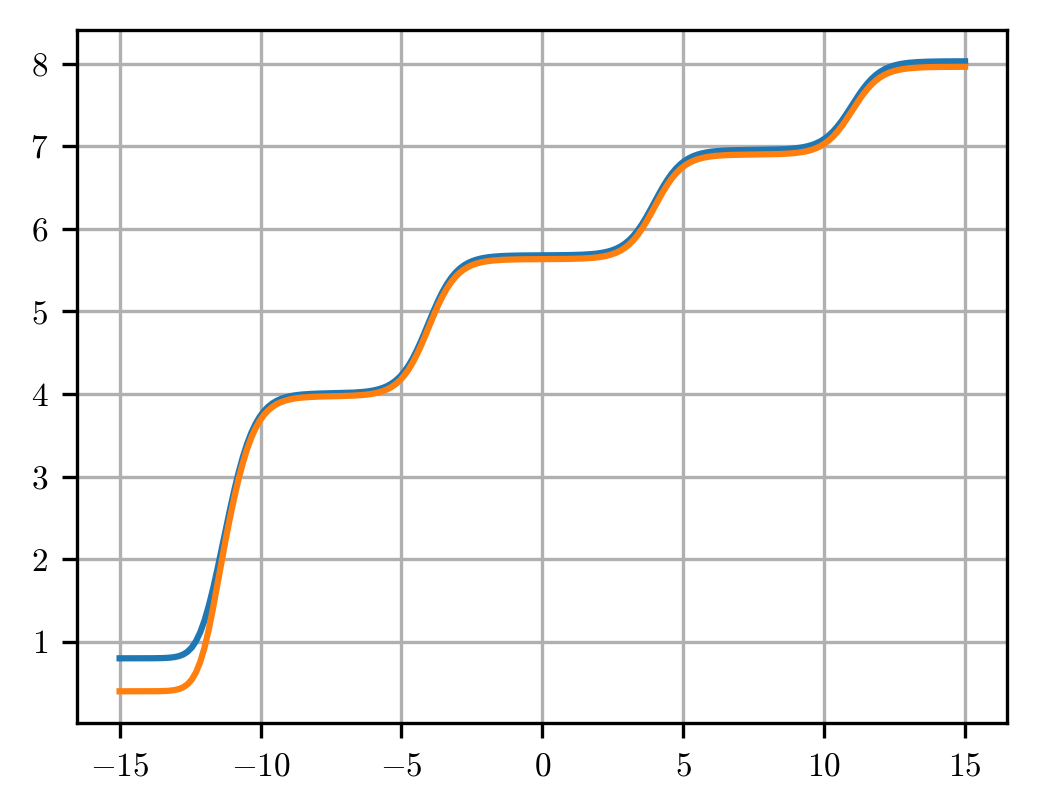

In [14]:
plt.plot(V_gate, frequency)
plt.plot(V_gate, frequency02)
#plt.ylim(top=5)